# Flongle Experiments


In [63]:
from read_clustering.variant_call import VariantCalls
threshold = 0.5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches


In [64]:
twoprimeo_pos = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958, 27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

twoprimeo_pos_25 = [ 648,  649,  662,  804,  806,  816,  866,  875,  897,  907, 1132,
       1436, 1448, 1449, 1887, 2196, 2219, 2255, 2279, 2280, 2287, 2336,
       2346, 2416, 2420, 2618, 2639, 2723, 2728, 2790, 2792, 2814, 2920,
       2921, 2945, 2947, 2958]

twoprimeo_pos_18 = [27,   99,  413,  419,  435,  540,  561,  577,  618,  795,  973,
       1006, 1125, 1268, 1270, 1427, 1571, 1638]

In [65]:
pseduo_u_pos = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974, 105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_18 = [105,  119,  210,  301,  465,  631,  758,  765,  998, 1180, 1186,
       1289, 1414]
pseduo_u_pos_25 = [ 775,  959,  965,  985,  989, 1003, 1041, 1051, 1055, 1109, 1123,
       2128, 2132, 2190, 2257, 2259, 2263, 2265, 2313, 2339, 2348, 2350,
       2415, 2734, 2825, 2864, 2879, 2922, 2943, 2974]


In [66]:
ivt_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/canonical_ivt.csv"
cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_cbf5_glu.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/run_nop_glu.csv"       
native_cbf5_gal_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/depletion/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true_min_sd_0/all_variant_calls/template_hmm30/native_cbf5_gal.csv"

cbf5_glu_psu_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_cbf5_glu_round30_alt_canonical_supervised_500_500.model.csv"
nop58_glu_2o_depletion_path = "/Users/andrewbailey/CLionProjects/read_clustering/data/inference/variant_calls/depletion_nop58_glu_round30_alt_canonical_supervised_500_500.model.csv"       


all_file_paths = [ivt_path, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, native_cbf5_gal_path]
all_labels = ["ivt", "cbf5_glu_psu_depletion", "nop58_glu_2o_depletion", "cbf5_gal"]



# # YWD448a: loss psu @ 18-759; 25-775(776)
# YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant448_YPD.csv"
# # YWD451a: loss psu @ 18-1289
# YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant451_YPD.csv"
# # YWD452a: loss of 2'Ome @ 18-436
# YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/mutant452_YPD.csv"
# # WT_CY: cycloheximide
# WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_CY.csv"
# # WT_CY: Potassium Acetate
# WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_KOAC.csv"
# # actual wildtype
# WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_pass_csvs/WT_YPD.csv"

# ROUND 2 experiments
# stationary phase
WT_stationary = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_stationary.csv"
# deletion of Dbp3d (a DEAD box protein important for processing 2'Ome snoRNAs U18 and U24)
Dbp3d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/Dbp3d_YPD.csv"
# PB (an RNA splicing inhibitor)
WT_PB = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_PB.csv"
# rapamycin treatment for 5 hours (activates the TOR kinase pathway that regulates cell growth and ribosome biogenesis)
WT_rapa5 = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_rapa5.csv"
# deletion of Trl1 (Manny showed this is important for making intron circles, which seem to me enriched for introns that encode snoRNAs)
trl1d_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/trl1d_YPD.csv"

YWD448a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant448_YPD.csv"
# YWD451a: loss psu @ 18-1289
YWD451a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant451_YPD.csv"
# YWD452a: loss of 2'Ome @ 18-436
YWD452a = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/mutant452_YPD.csv"
# WT_CY: cycloheximide
WT_CY = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_CY.csv"
# WT_CY: Potassium Acetate
WT_KOAC = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_KOAC.csv"
# actual wildtype
WT_YPD = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/WT_YPD.csv"

prp43_18deg = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/prp43_18deg.csv"
mix = "/Users/andrewbailey/CLionProjects/rrna_analysis/flongle/flongle_all_csvs/Mix.csv"


file_paths = [YWD448a, YWD451a, YWD452a, WT_CY, WT_KOAC, WT_YPD]
labels = ["YWD448a", "YWD451a", "YWD452a", "WT_CY", "WT_KOAC", "WT_YPD"]
all_file_paths.extend(file_paths)
all_labels.extend(labels)

In [5]:
# depletions 1
all_file_paths = [WT_YPD, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path, ivt_path]
all_labels = ["1: wild type", "2: CBF5 PseudoU depletion", "3: NOP58 2'O-Methyl depletion", "4: ivt"]


In [6]:
# knockouts
all_file_paths = [WT_YPD, YWD448a, YWD451a, YWD452a, ivt_path]
all_labels = ["1: wild type", "2: 448a", "3: 451a", "4: 452a", "5: ivt"]


In [68]:
# experiments
all_file_paths = [WT_YPD, WT_CY, WT_KOAC, Dbp3d_YPD, WT_PB, WT_rapa5, WT_stationary, trl1d_YPD, 
                 YWD448a, YWD451a, YWD452a, prp43_18deg, mix]
all_labels = ["1: wild type", "2: Cycloheximide", "3: 1% potassium acetate (KOAC)",
             "4: deletion of Dbp3d", "5: PB", "6: rapamycin", "7: stationary phase", 
           "8: deletion of Trl1", "9: YWD448a", "10: YWD451a", "11: YWD452a", 
              "12: prp43_18deg", "13: mix"]

# all_file_paths = [Dbp3d_YPD]
# all_labels = ["1: deletion of Dbp3d"]


In [8]:
# depletions 2
all_file_paths = [WT_YPD, cbf5_glu_psu_depletion_path, nop58_glu_2o_depletion_path]
all_labels = ["1: wild type", "2: CBF5 PseudoU depletion", "3: NOP58 2'O-Methyl depletion"]


In [54]:
all_file_paths = [WT_YPD, mix, prp43_18deg]
all_labels = ["1: wild type", "2: mix", "3: prp43_18deg", ]
all_file_paths = [mix]
all_labels = ["1: mix"]
all_file_paths = [prp43_18deg]
all_labels = ["1: prp43_18deg"]
# all_file_paths = [Dbp3d_YPD, prp43_18deg]
# all_labels = ["1: Dbp3d_YPD", "2: prp43_18deg"]
# all_file_paths = [WT_YPD, Dbp3d_YPD, prp43_18deg]
# all_labels = ["1: wild type", "2: Dbp3d_YPD", "3: prp43_18deg"]


In [72]:
# vc = VariantCalls(file_paths, labels)
# vc = VariantCalls(all_file_paths, all_labels, color_map="Set1")
vc = VariantCalls(all_file_paths, all_labels, color_map="tab20")


In [50]:
contig = 'RDN18-1'
_18s = vc.get_X(contig, vc.get_contig_positions(contig))

contig = 'RDN25-1'
_25s = vc.get_X(contig, vc.get_contig_positions(contig))


In [51]:
plot_data = _18s.xs("1: wild type", level="label")
len(plot_data)

3011

In [ ]:
plot_data = _25s.xs("1: wild type", level="label")
len(plot_data)

<IPython.core.display.Javascript object>


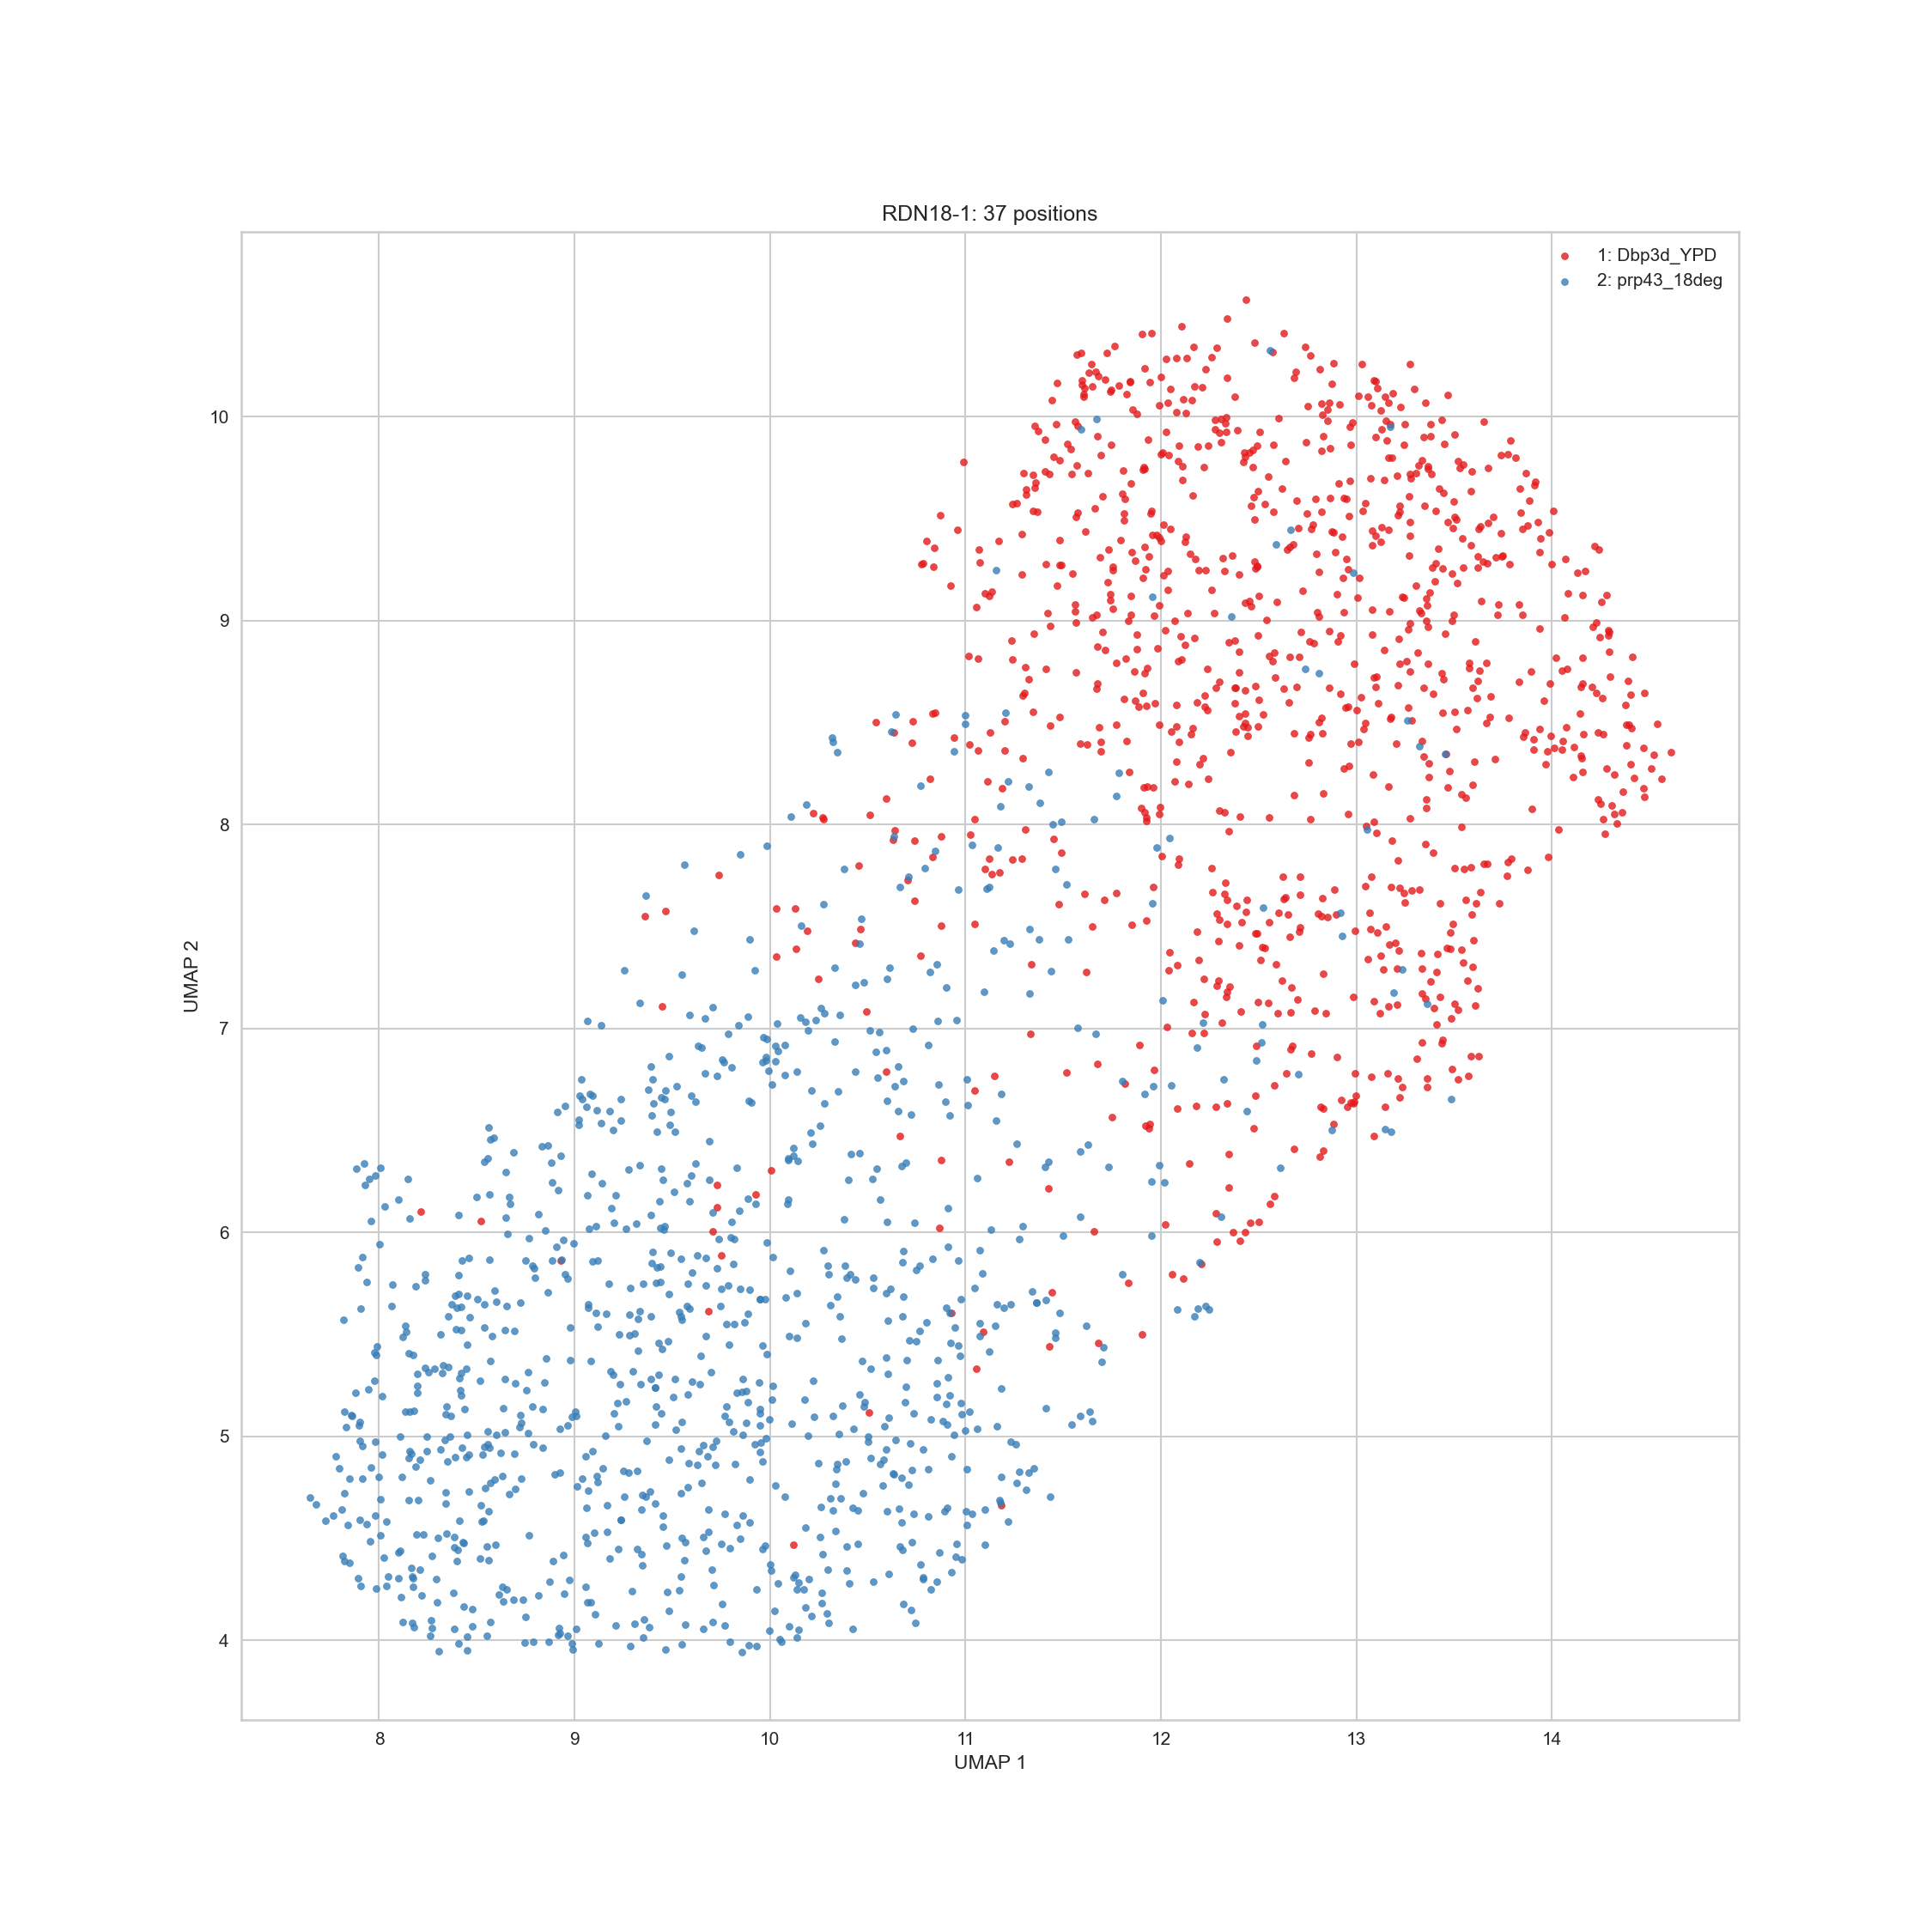

In [44]:
# from IPython.display import set_matplotlib_formats
# %matplotlib inline
# set_matplotlib_formats('svg')
# import matplotlib.pyplot as plt
# plt.rcParams['svg.fonttype'] = 'none'
%matplotlib notebook

contig = 'RDN18-1'
n_components = 2
n = 1000
save_fig_path = None
other_params = {"alpha": 0.8, "s":15}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_umap_wt_deps.png"
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, **other_params)   

<IPython.core.display.Javascript object>


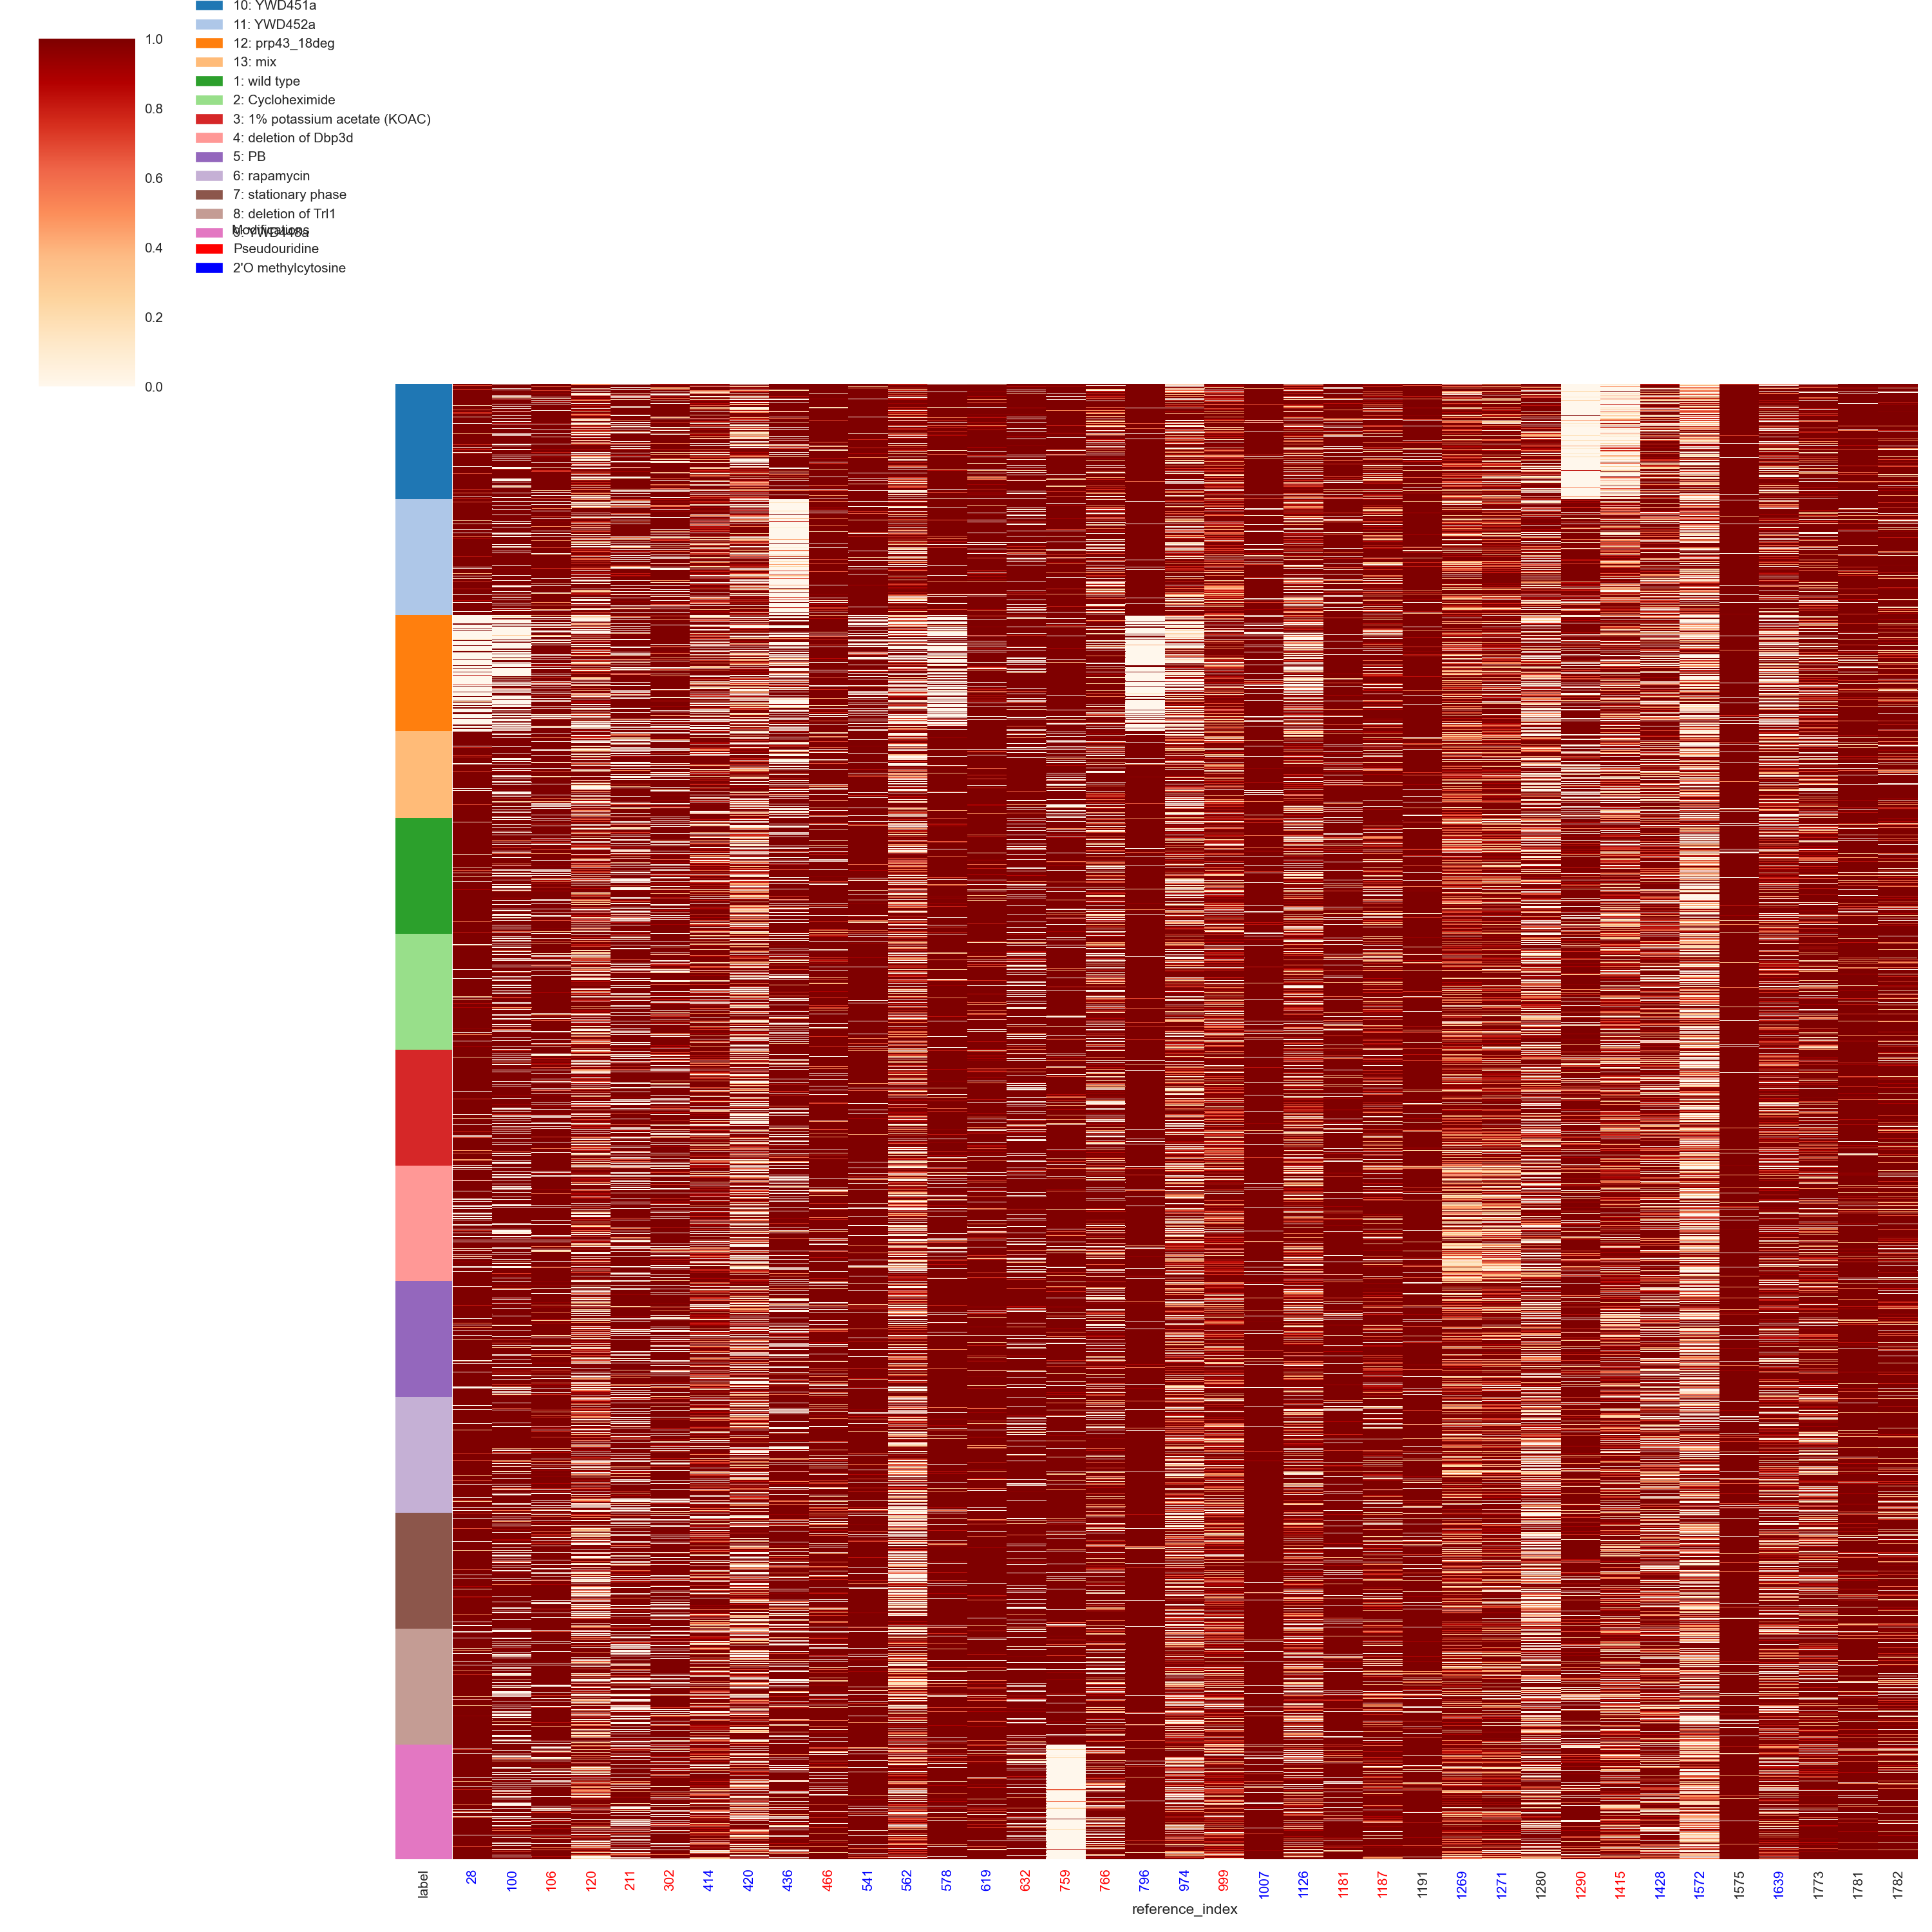

In [74]:
# %matplotlib notebook

n = 500
save_fig_path = None
metric = 'euclidean'
metric = "correlation"

method = 'average'
contig = 'RDN18-1'
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_wt_deps.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_dendrogram_wt_prp43.png"
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{contig}_dendrogram_all.png"

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=False,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


<IPython.core.display.Javascript object>


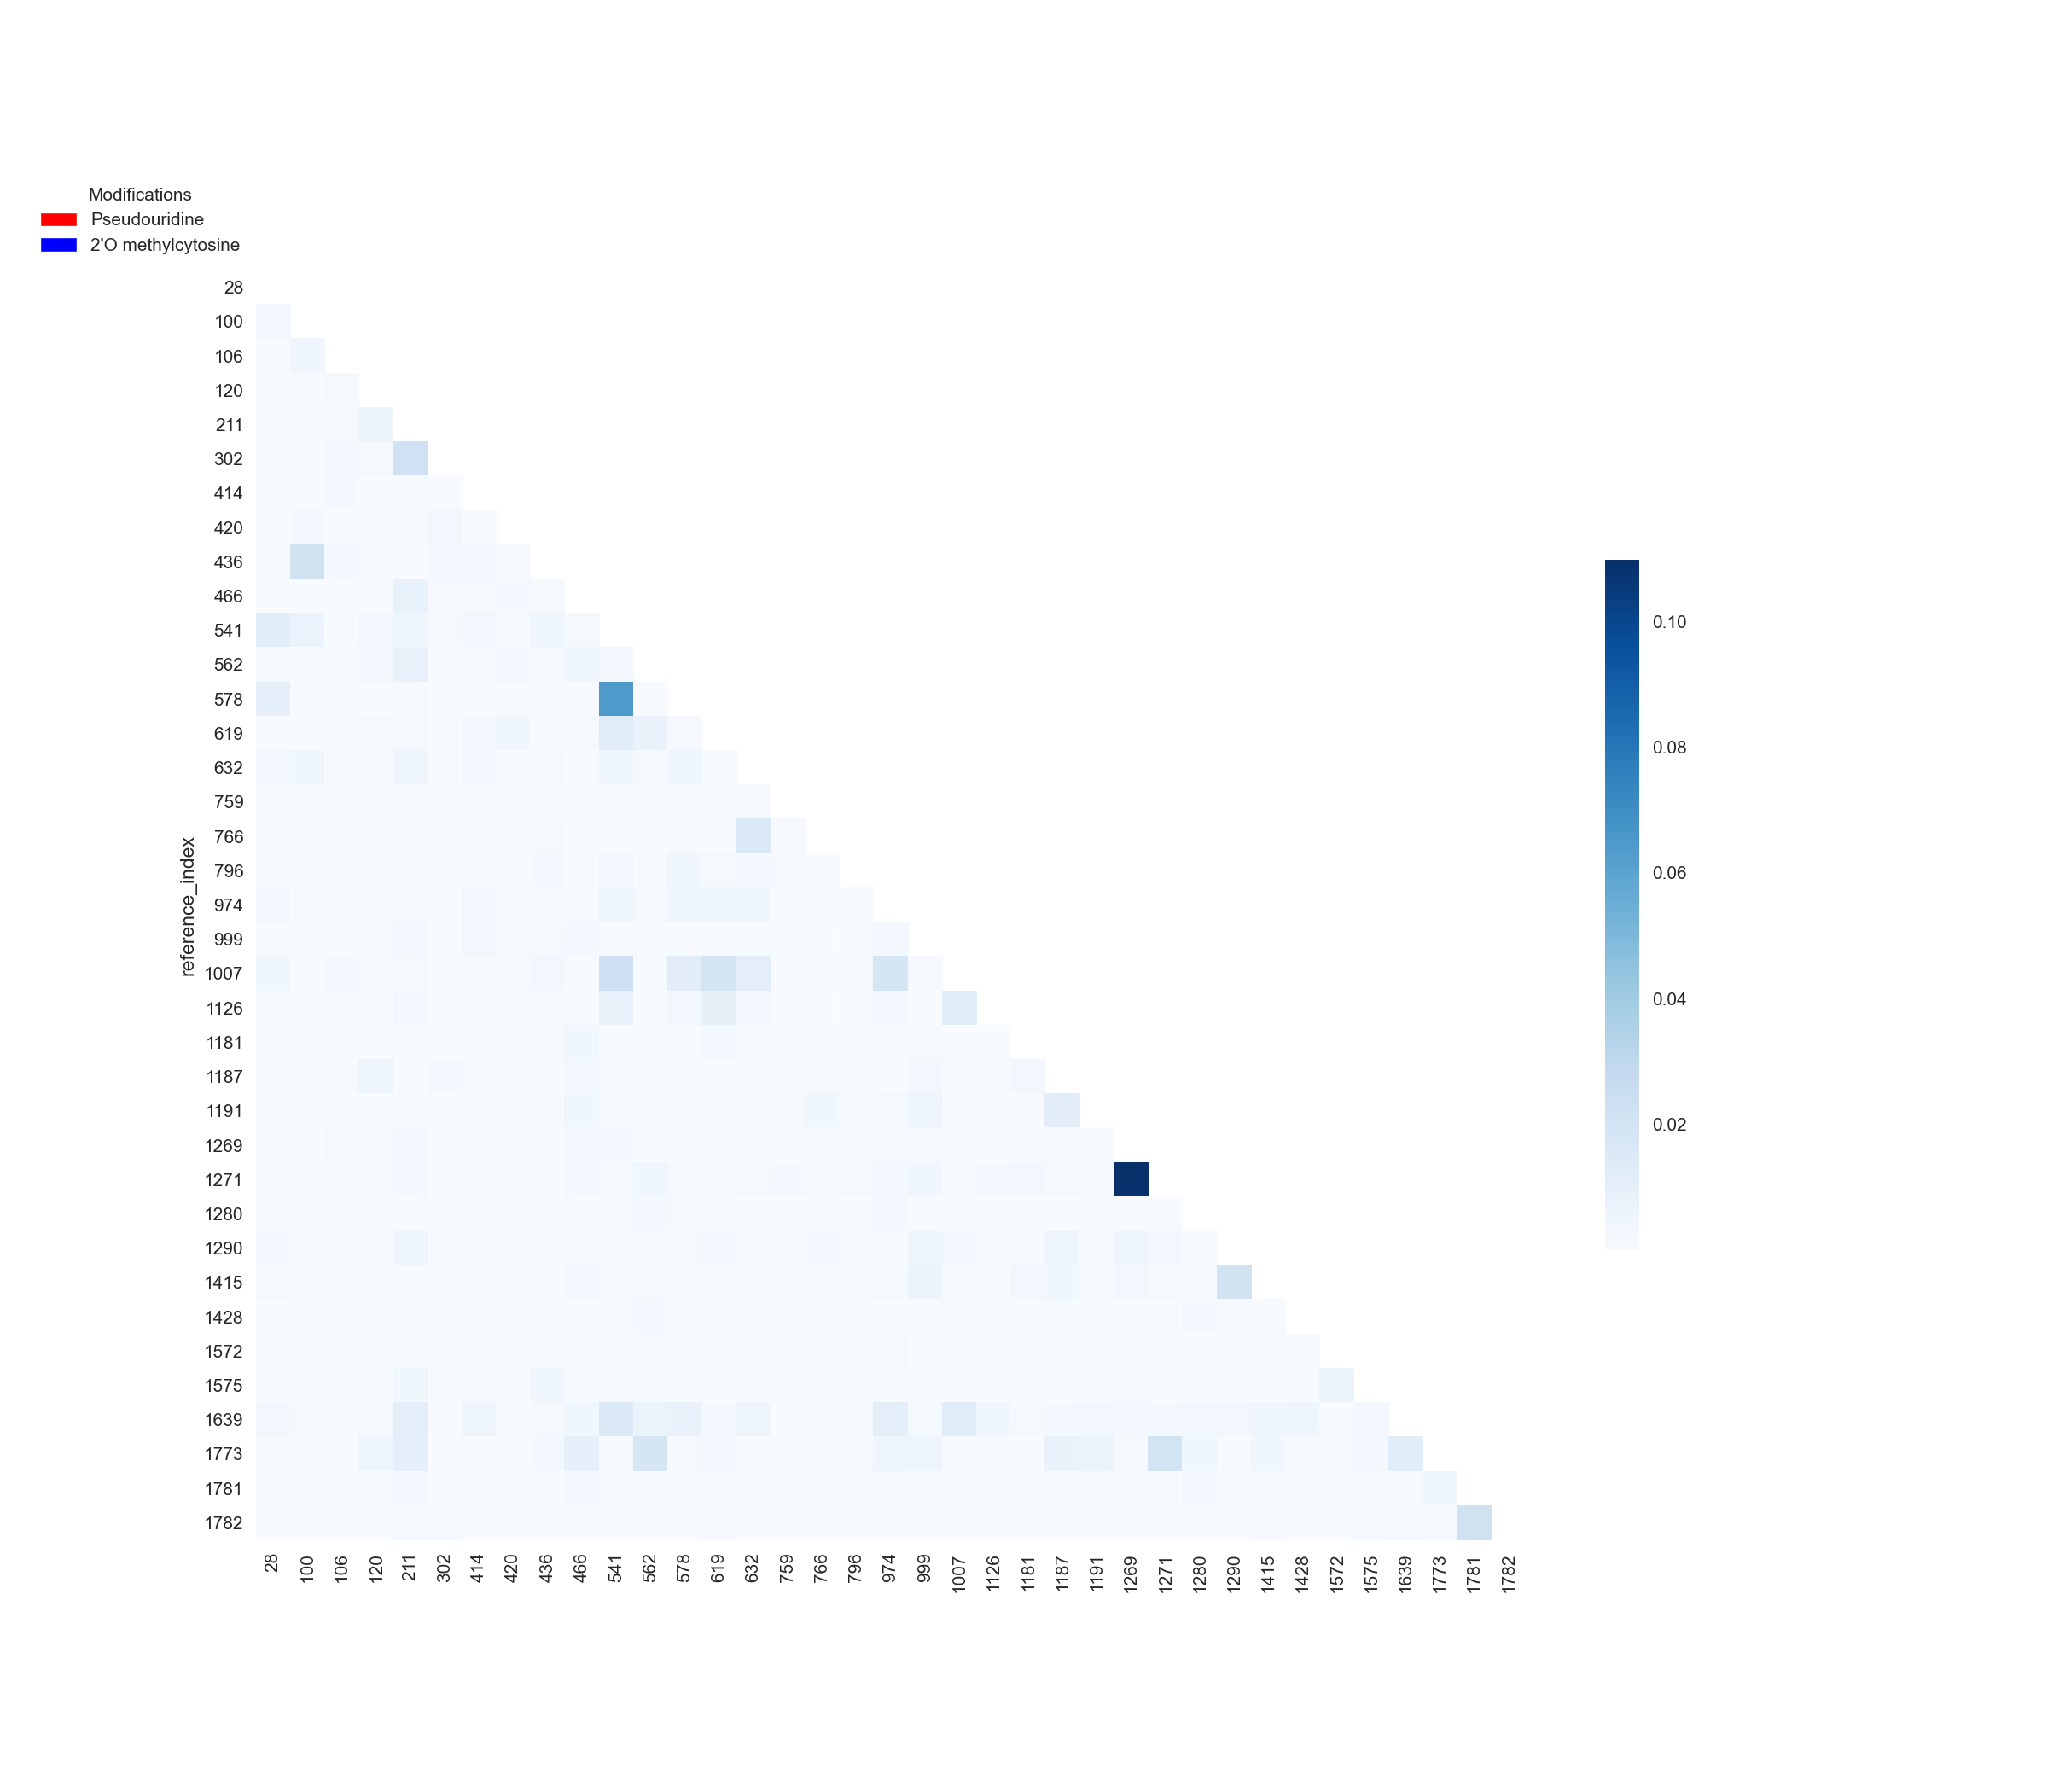

,27r2,99r2,105r2,119r2,210r2,301r2,413r2,419r2,435r2,465r2,...,1279r2,1289r2,1414r2,1427r2,1571r2,1574r2,1638r2,1772r2,1780r2,1781r2
reference_index,,,,,,,,,,,,,,,,,,,,,
27,1.000000,2.478017e-03,0.000338,1.208272e-04,0.000819,1.058086e-03,1.223503e-04,2.144807e-05,9.005633e-04,0.000255,...,0.001016,2.843621e-03,0.001888,0.000018,7.879068e-04,1.215645e-03,0.003632,0.002102,0.000362,1.990943e-04
99,0.002478,1.000000e+00,0.003962,1.387052e-04,0.001135,7.653480e-05,5.316787e-05,2.706379e-03,2.146499e-02,0.000076,...,0.000077,1.107076e-03,0.000507,0.000169,4.975100e-05,1.196042e-07,0.001516,0.001246,0.000048,1.982946e-05
105,0.000338,3.962242e-03,1.000000,1.369731e-03,0.000479,3.187557e-03,2.272001e-03,4.165974e-04,2.812781e-03,0.000551,...,0.001183,5.143842e-04,0.000172,0.000791,1.052130e-04,7.526016e-05,0.000460,0.000323,0.000038,2.686492e-05
119,0.000121,1.387052e-04,0.001370,1.000000e+00,0.006676,1.333149e-03,3.582408e-07,1.133335e-04,1.071868e-03,0.000774,...,0.000004,8.285801e-04,0.001104,0.000217,7.220208e-05,7.785495e-04,0.001496,0.005370,0.000016,1.762551e-05
210,0.000819,1.134881e-03,0.000479,6.675767e-03,1.000000,2.251348e-02,1.157569e-03,4.394681e-04,4.119619e-04,0.008920,...,0.001114,5.884682e-03,0.000736,0.000542,1.633452e-04,4.670654e-03,0.010750,0.010255,0.002439,2.065525e-03
301,0.001058,7.653480e-05,0.003188,1.333149e-03,0.022513,1.000000e+00,6.022010e-06,3.689981e-03,2.834452e-03,0.001686,...,0.000262,1.311428e-03,0.000090,0.000240,1.353726e-04,1.059536e-04,0.000048,0.000030,0.000234,1.745577e-03
413,0.000122,5.316787e-05,0.002272,3.582408e-07,0.001158,6.022010e-06,1.000000e+00,3.750496e-04,2.589616e-03,0.001868,...,0.000103,8.822837e-04,0.000156,0.001764,2.153138e-05,1.458632e-03,0.005477,0.000082,0.001681,2.355744e-04
419,0.000021,2.706379e-03,0.000417,1.133335e-04,0.000439,3.689981e-03,3.750496e-04,1.000000e+00,6.432849e-04,0.002228,...,0.001130,7.832564e-04,0.000140,0.000013,8.274430e-05,2.748613e-04,0.000390,0.000057,0.000099,8.971023e-05
435,0.000901,2.146499e-02,0.002813,1.071868e-03,0.000412,2.834452e-03,2.589616e-03,6.432849e-04,1.000000e+00,0.001966,...,0.000117,1.896774e-09,0.000103,0.000011,4.852777e-04,4.688124e-03,0.001603,0.002203,0.000033,4.058083e-04


In [57]:
contig = 'RDN18-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


<IPython.core.display.Javascript object>


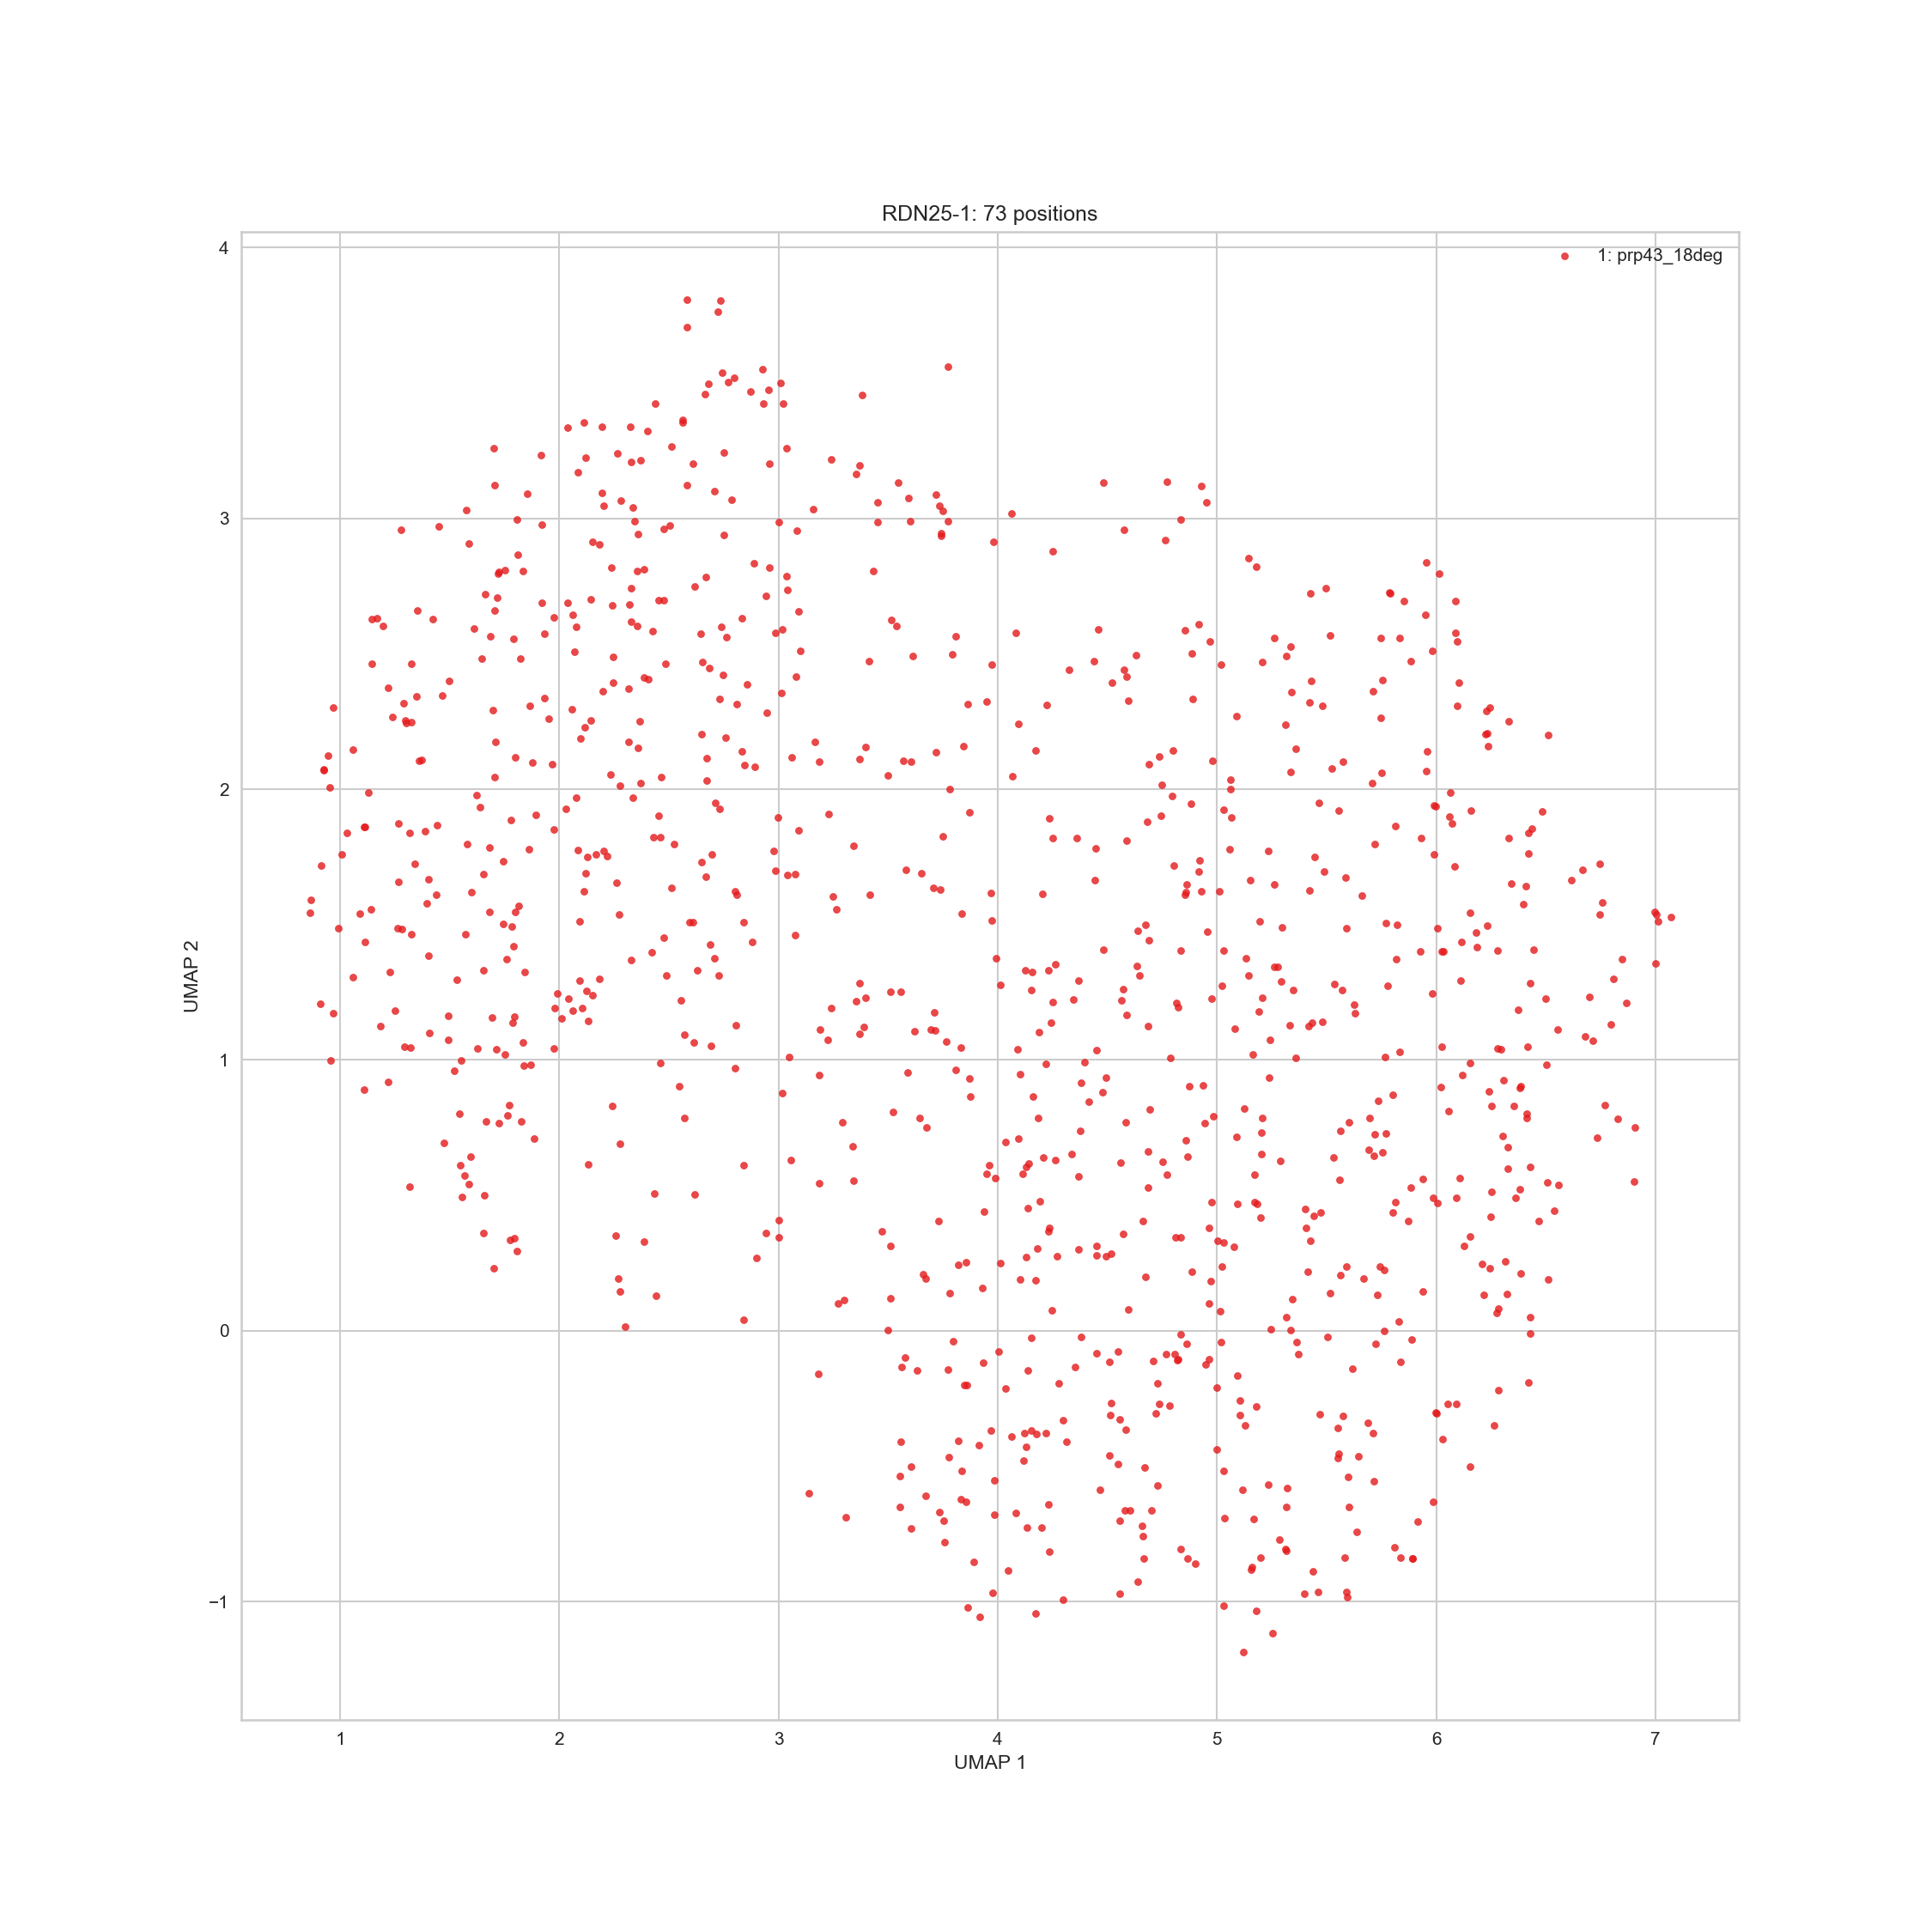

In [36]:
contig = 'RDN25-1'
n_components = 2
n = 1000
save_fig_path = None
other_params = {"alpha": 0.8, "s":15}
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_umap_wt_deps.png"
# save_fig_path = None
vc.plot_UMAP_by_label(contig, vc.get_contig_positions(contig), n_components=n_components, figure_path=save_fig_path, n=n, **other_params)       

<IPython.core.display.Javascript object>


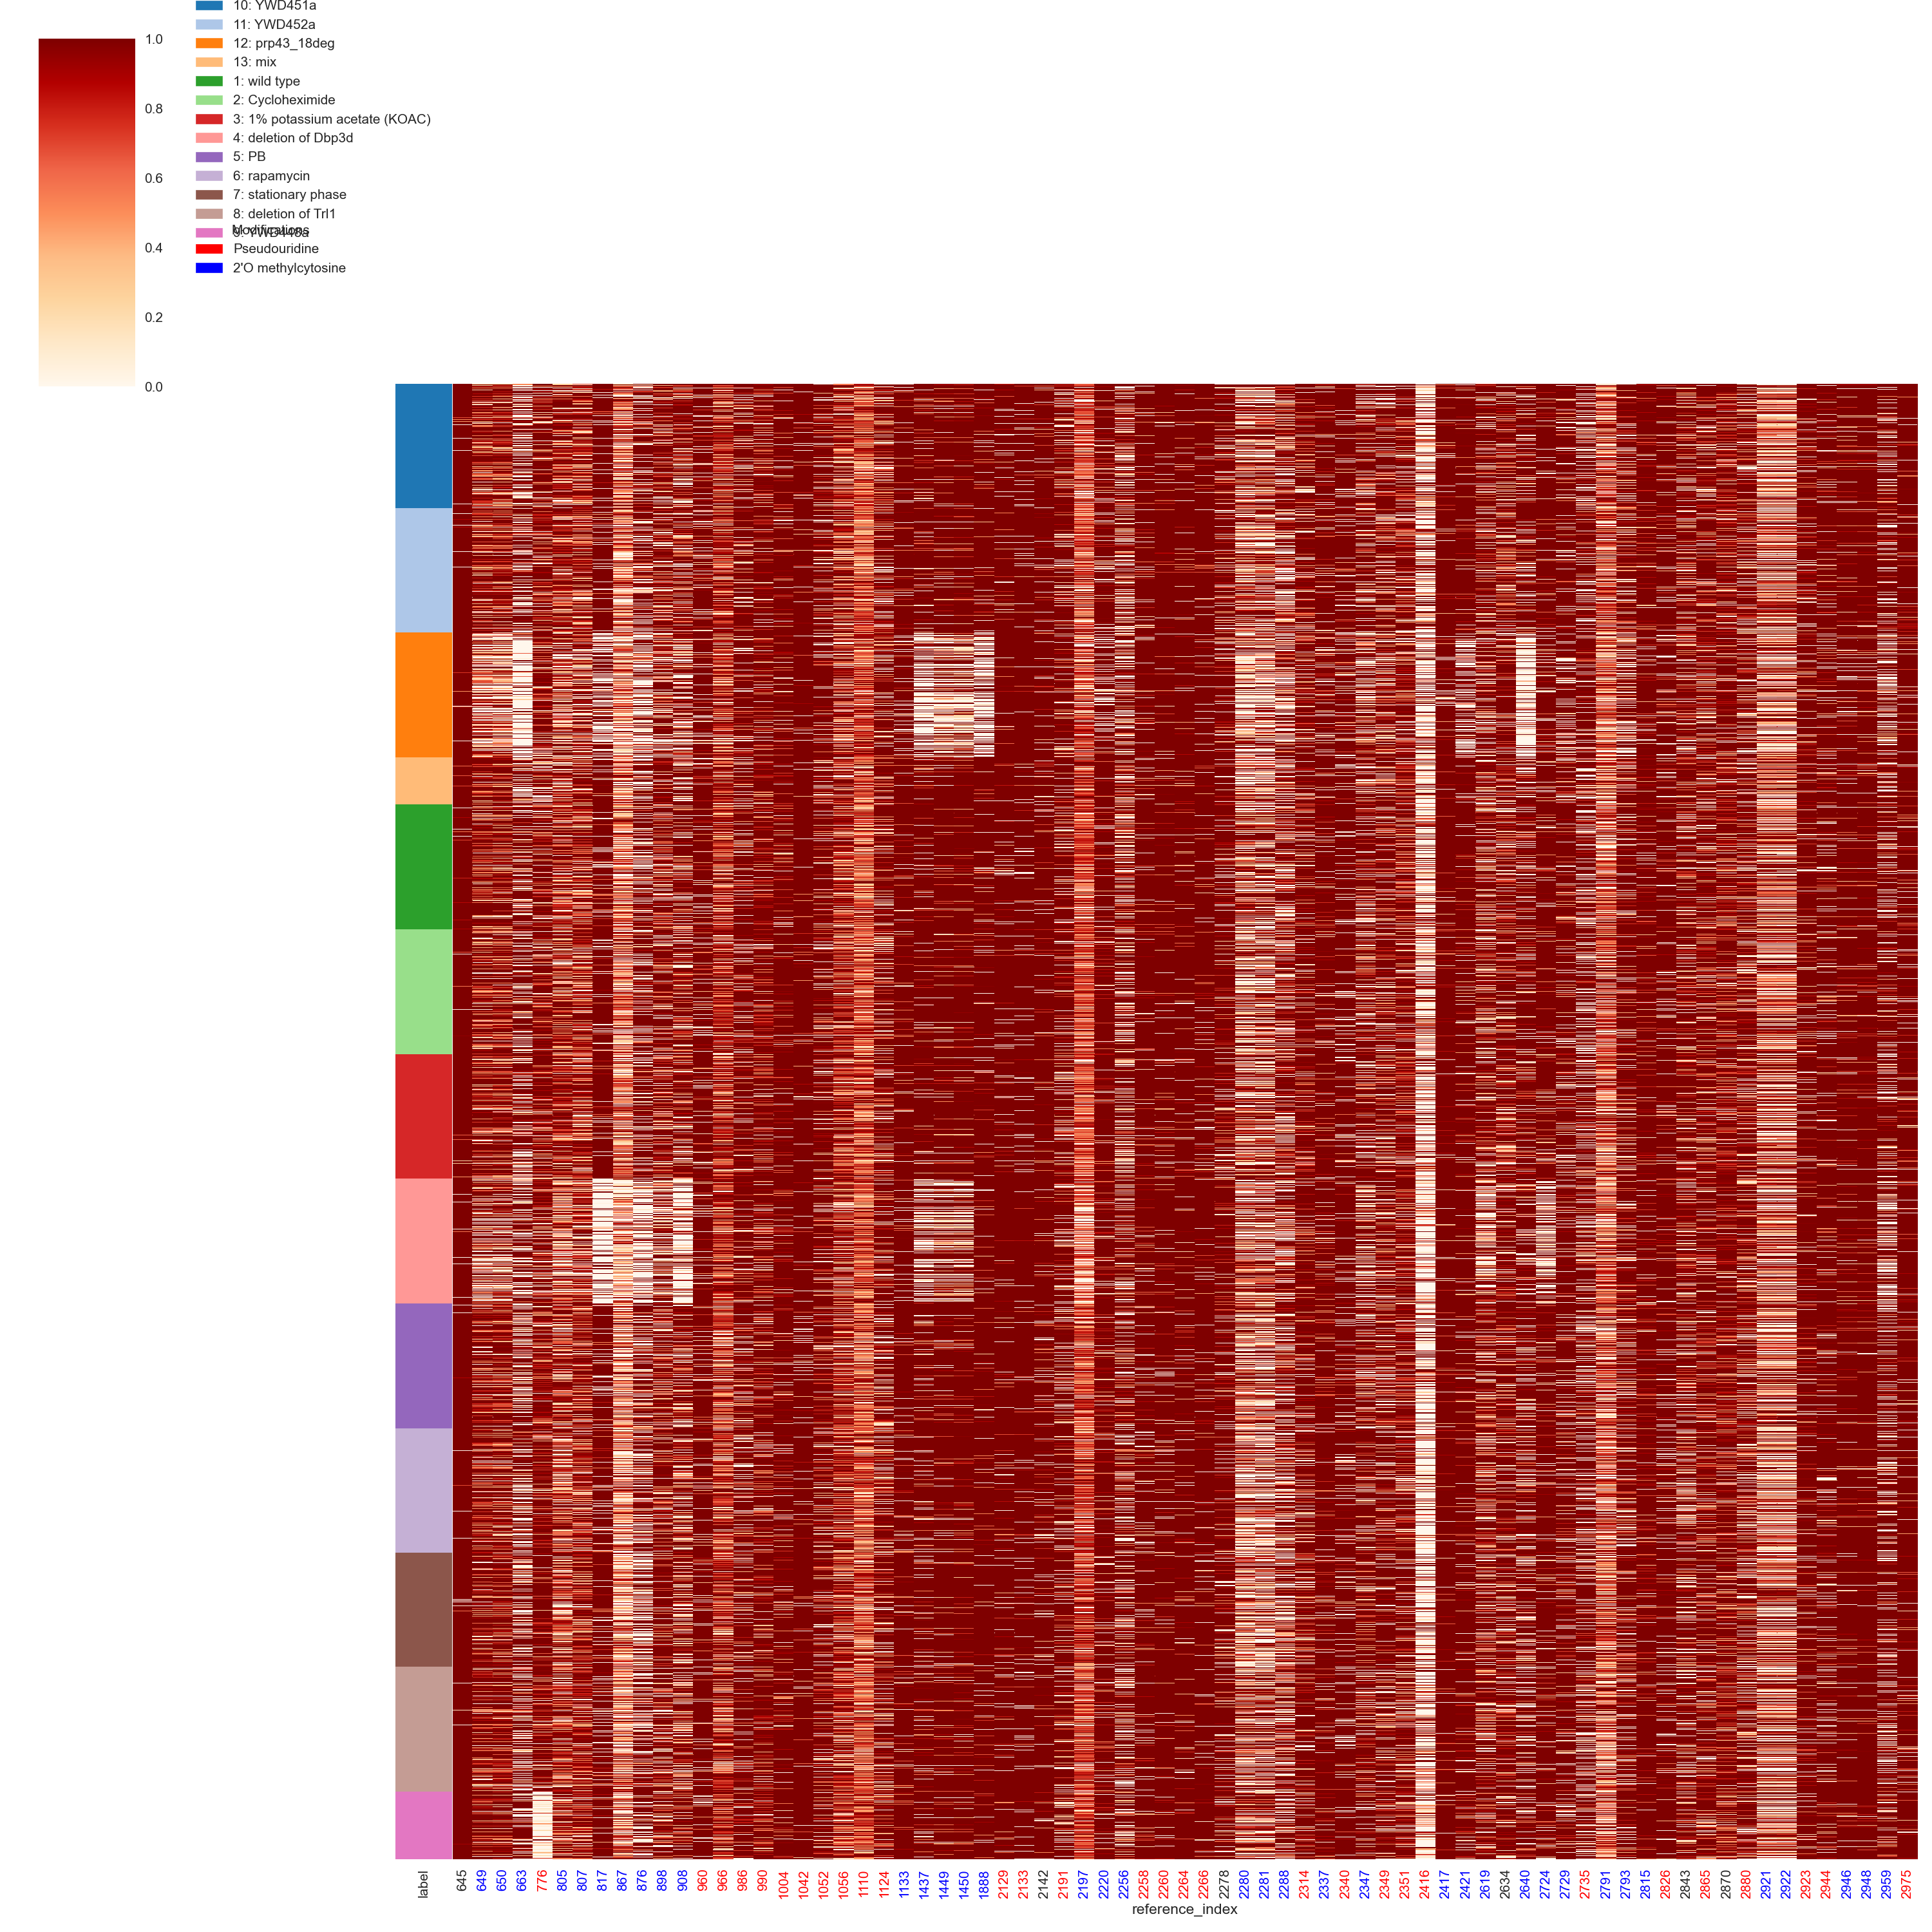

In [75]:
n = 500
contig = 'RDN25-1'

figure_path = None
# figure_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{n}_knockdowns_25S.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure2/{contig}_dendrogram_wt_deps.png"
# save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/Figure4/{contig}_dendrogram_wt_prp43.png"
save_fig_path = f"/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/{contig}_dendrogram_all.png"

metric = 'euclidean'
metric = "correlation"

method = 'average'

vc.plot_heatmap_dendrogram(contig, vc.get_contig_positions(contig), n=n, figure_path=save_fig_path,
                           metric=metric,
                           method=method, 
                           col_cluster=False,
                           row_cluster=False,
                           twoprimeo_pos=twoprimeo_pos,
                           pseduo_u_pos=pseduo_u_pos)


<IPython.core.display.Javascript object>


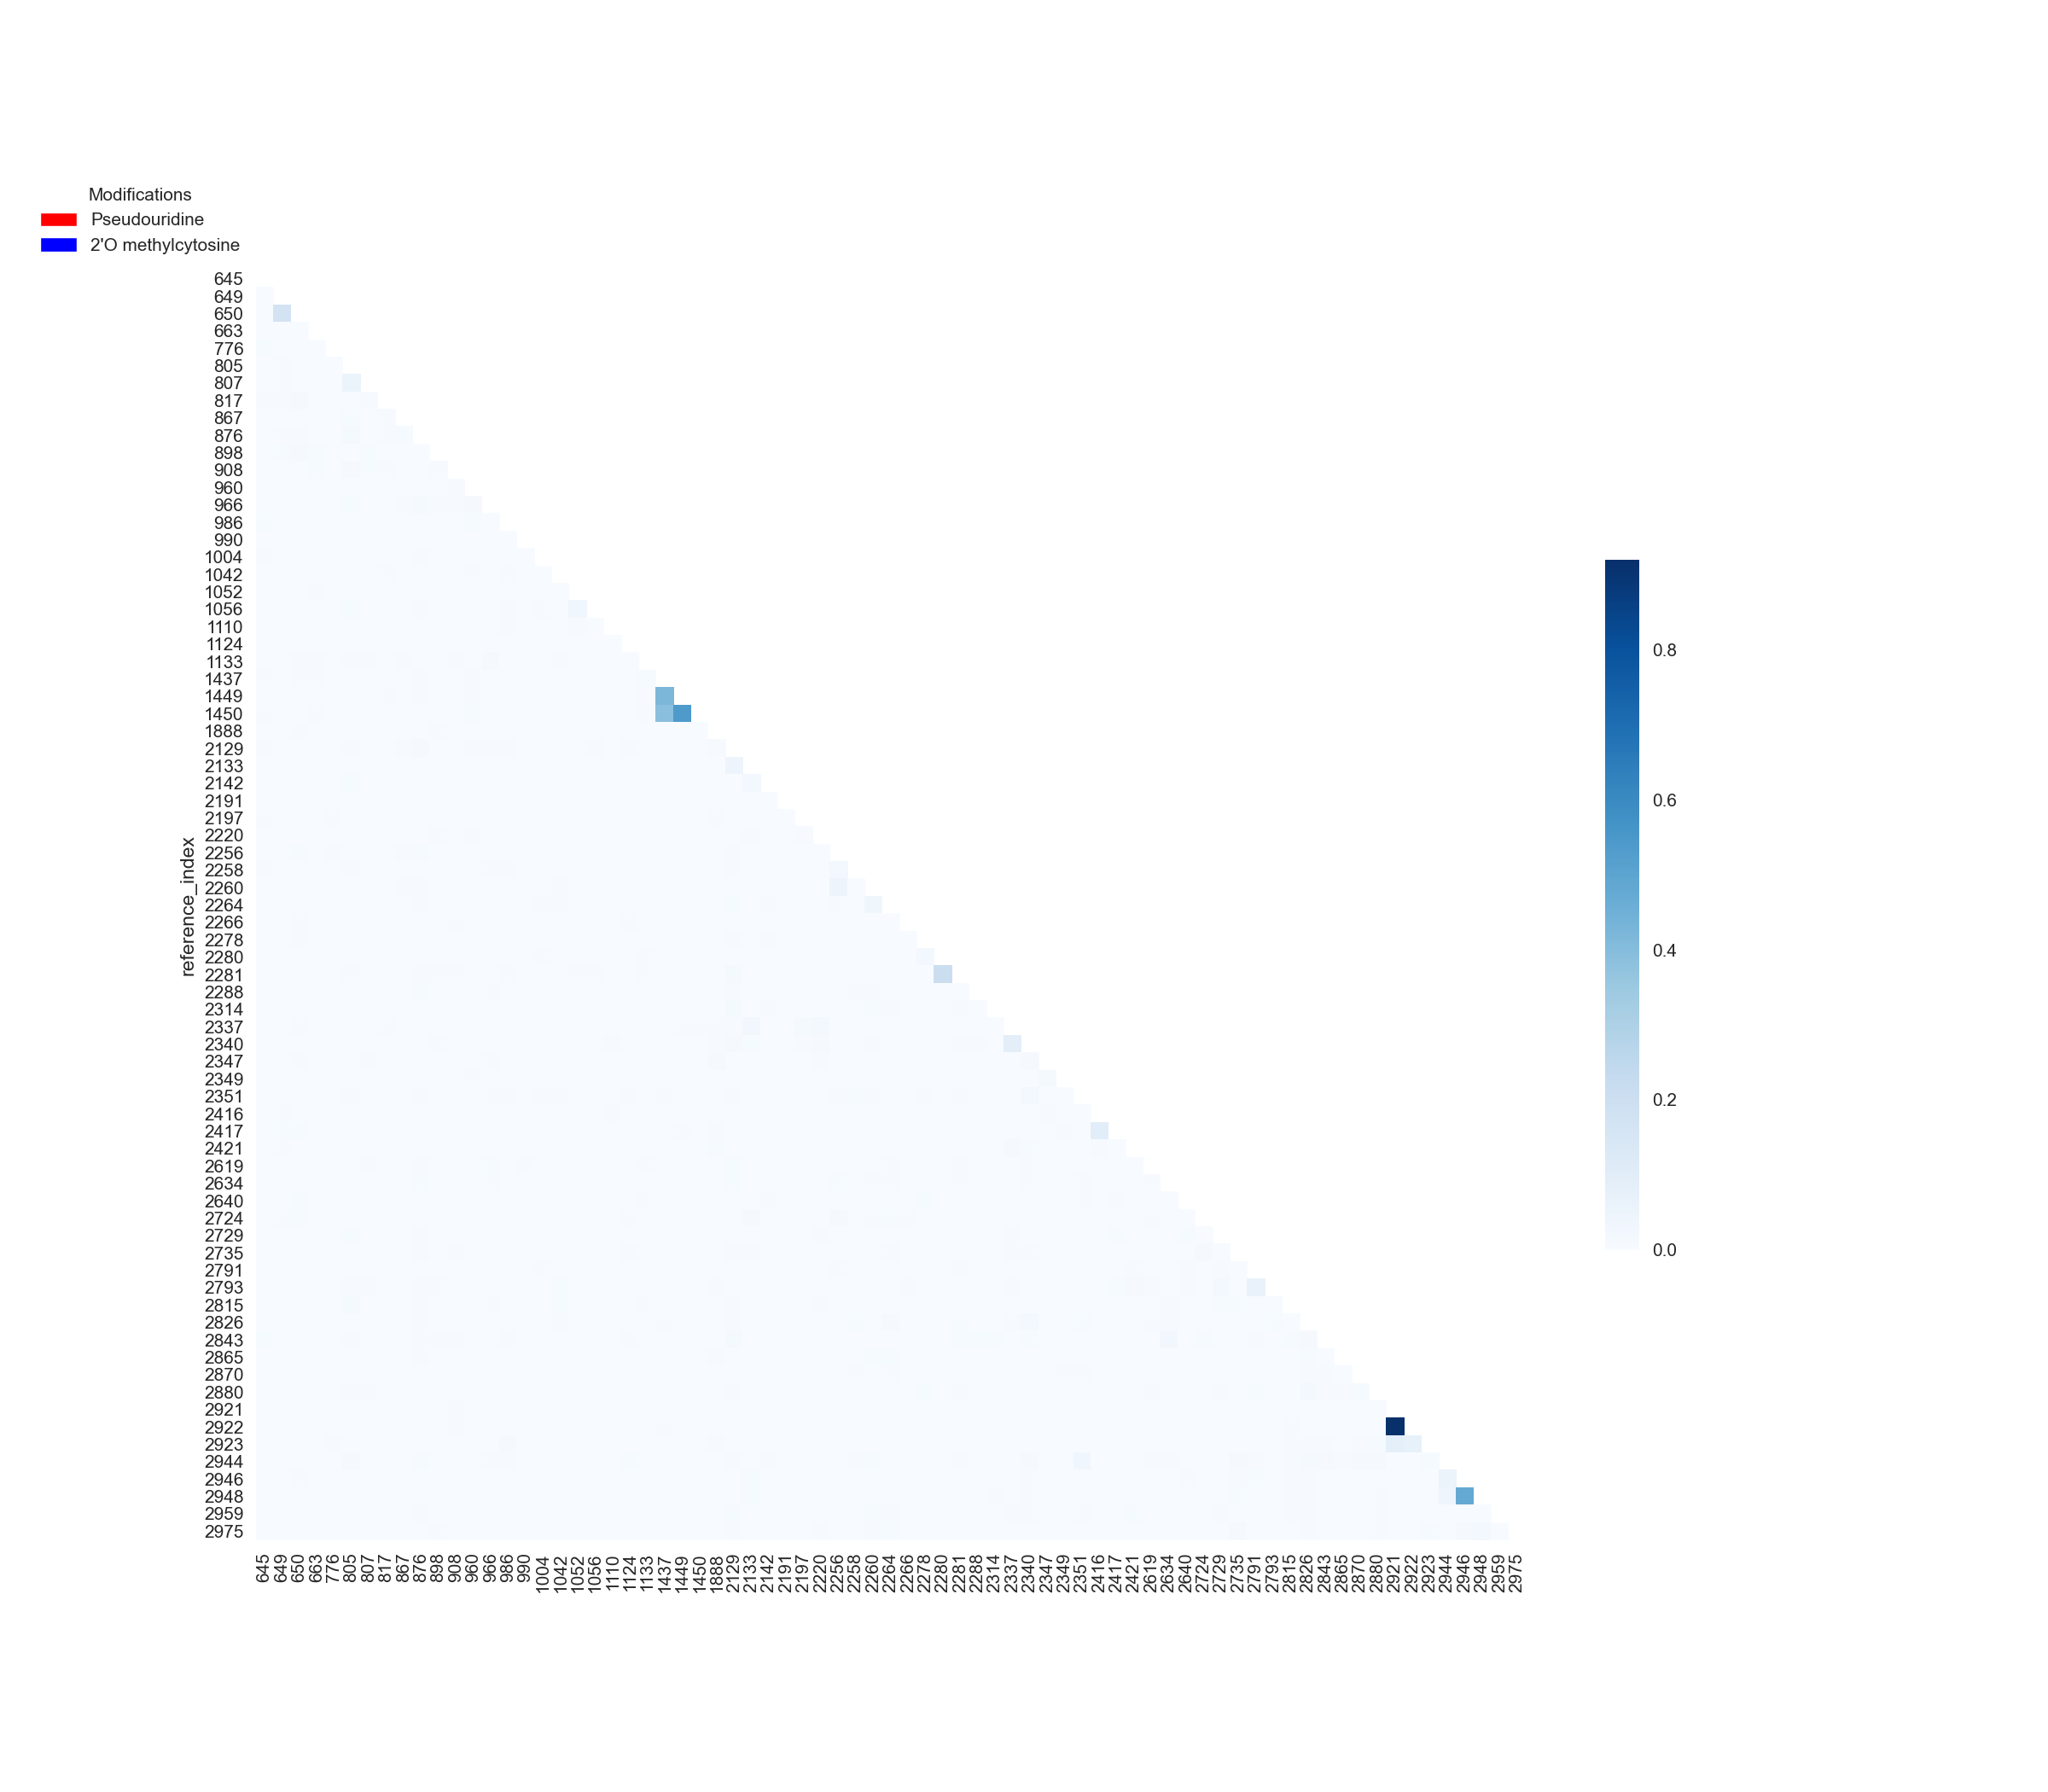

,644r2,648r2,649r2,662r2,775r2,804r2,806r2,816r2,866r2,875r2,...,2869r2,2879r2,2920r2,2921r2,2922r2,2943r2,2945r2,2947r2,2958r2,2974r2
reference_index,,,,,,,,,,,,,,,,,,,,,
644,1.000000,0.000569,0.000108,0.000063,0.008519,2.160432e-03,0.000129,0.004244,0.000023,0.003273,...,0.000397,0.000124,0.000193,2.815807e-07,0.002696,0.000259,0.000261,0.000753,0.000885,0.000067
648,0.000569,1.000000,0.169585,0.000521,0.000014,3.931527e-03,0.004392,0.007155,0.000010,0.006017,...,0.000027,0.001637,0.001104,1.418987e-03,0.001246,0.001311,0.000312,0.000136,0.000129,0.000136
649,0.000108,0.169585,1.000000,0.000053,0.000018,2.285524e-03,0.003513,0.012253,0.002200,0.006070,...,0.000060,0.001146,0.000172,4.207340e-04,0.000316,0.000758,0.004076,0.002661,0.001860,0.000055
662,0.000063,0.000521,0.000053,1.000000,0.000258,8.644867e-04,0.003073,0.000036,0.000009,0.000506,...,0.000021,0.002252,0.000134,5.093248e-05,0.000939,0.000808,0.000018,0.000115,0.000119,0.000180
775,0.008519,0.000014,0.000018,0.000258,1.000000,3.019237e-04,0.002889,0.000070,0.000581,0.000070,...,0.001884,0.000094,0.000939,6.239445e-04,0.005931,0.000412,0.000101,0.000043,0.001119,0.000326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,0.000259,0.001311,0.000758,0.000808,0.000412,1.153141e-02,0.002582,0.001237,0.001090,0.007854,...,0.014343,0.014347,0.000006,2.321506e-04,0.010119,1.000000,0.056065,0.043563,0.002839,0.000637
2945,0.000261,0.000312,0.004076,0.000018,0.000101,5.816390e-07,0.001362,0.000045,0.001499,0.000436,...,0.001365,0.000533,0.000237,2.021794e-06,0.000269,0.056065,1.000000,0.478262,0.002095,0.013603
2947,0.000753,0.000136,0.002661,0.000115,0.000043,4.727079e-04,0.000146,0.000365,0.001159,0.000332,...,0.001665,0.004524,0.000311,4.431020e-05,0.000839,0.043563,0.478262,1.000000,0.001114,0.024007


In [60]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


In [61]:
len(vc.get_X("RDN25-1", vc.get_contig_positions("RDN25-1")))

1333

In [62]:
len(vc.get_X("RDN18-1", vc.get_contig_positions("RDN18-1")))

2816

In [94]:
all_file_paths = [WT_YPD]
all_labels = ["1: wild type"]

vc = VariantCalls(all_file_paths, all_labels)


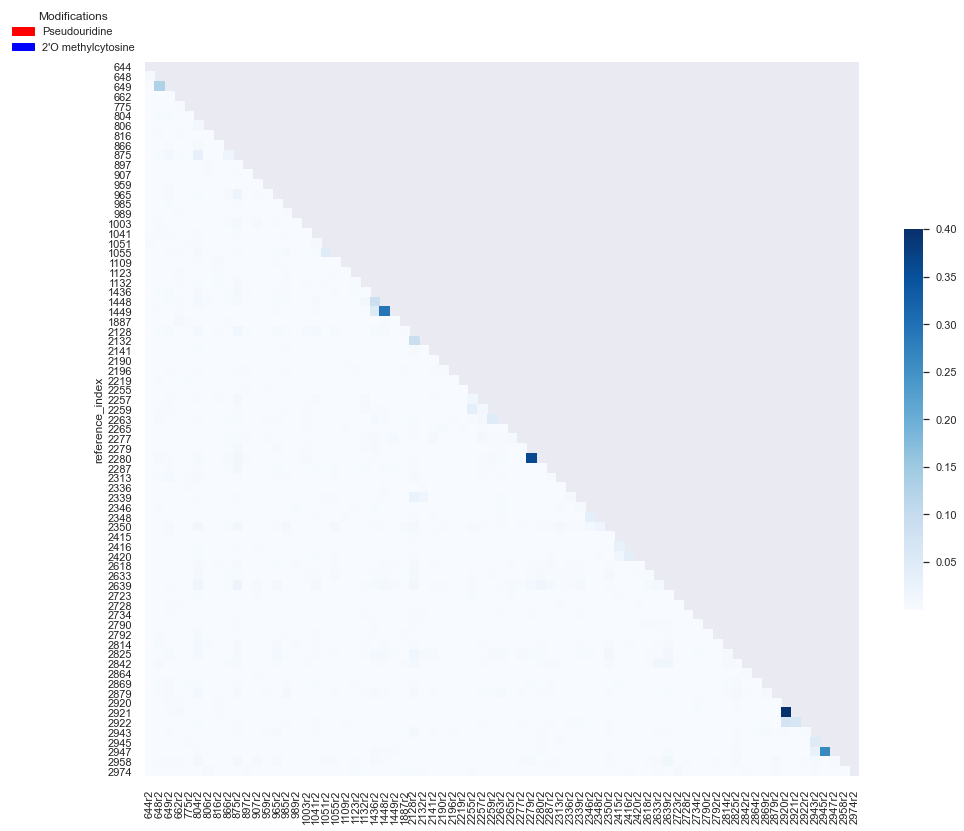

In [100]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "binary"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc.plot_ld_heatmap(contig, vc.get_contig_positions(contig), stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


# Get positions which have largest difference in percent mod

In [6]:
all_file_paths = [Dbp3d_YPD, WT_YPD]
all_labels = ["Dbp3d", "wt"]

vc = VariantCalls(all_file_paths, all_labels)


In [7]:
contig = "RDN25-1"
positions = vc.get_contig_positions(contig)

X = vc.get_X(contig, positions)

In [17]:
Dbp3d = X.loc[(slice(None), 'Dbp3d'), :]
wt = X.loc[(slice(None), 'wt'), :]


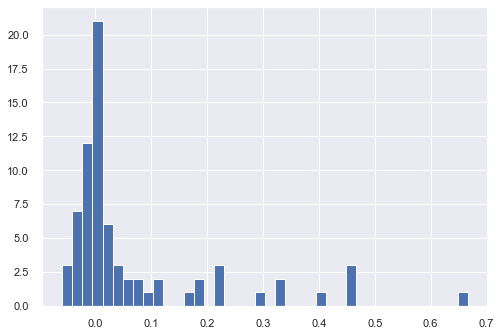

In [41]:
differences = (wt.mean() - Dbp3d.mean()).sort_values(ascending=False)
differences.hist(bins=40)

In [59]:
pd.set_option('display.max_rows', None)
print(differences)
pd.set_option('display.max_rows', 10)


reference_index
816     0.666368
907     0.460903
875     0.452596
2723    0.451484
1436    0.407225
1449    0.332314
1448    0.323183
2618    0.286763
649     0.224768
648     0.218495
804     0.215347
2958    0.192338
866     0.177728
897     0.162976
2196    0.119268
806     0.114703
2346    0.087105
2287    0.078304
2415    0.069655
1132    0.059013
2814    0.051486
2639    0.040732
965     0.032280
2420    0.031702
2279    0.029583
2219    0.023972
775     0.022791
662     0.020788
989     0.016739
2947    0.016654
2920    0.013346
2336    0.013175
2921    0.011829
2974    0.010741
2945    0.010012
1887    0.007807
2842    0.007651
2280    0.006610
2348    0.005579
644     0.004812
2416    0.003816
1051    0.002605
1055    0.002381
959     0.001382
2259    0.000518
2257   -0.001294
2728   -0.001959
2879   -0.002042
2339   -0.002974
2265   -0.003919
1041   -0.004114
2190   -0.008805
985    -0.010437
2141   -0.010461
2943   -0.010749
2263   -0.011183
2792   -0.012432
1109   -0.01496

## Split 25S clusters


In [7]:
all_file_paths = [Dbp3d_YPD, WT_YPD]
all_labels = ["Dbp3d", "wt"]

vc = VariantCalls(all_file_paths, all_labels)


In [8]:
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
contig = "RDN25-1"


In [9]:
positions = vc.get_contig_positions(contig)
data = vc.data[(vc.data["contig"] == contig) & (vc.data['reference_index'].isin(positions))]
df = data.pivot(index=['read_id', 'label'], columns=['reference_index'], values='prob2')
X = df.dropna()
Dbp3d = X.loc[(slice(None), 'Dbp3d'), :]
wt = X.loc[(slice(None), 'wt'), :]


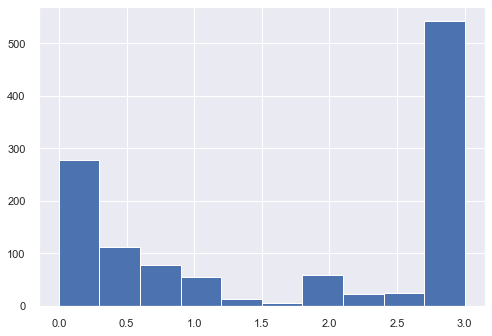

In [10]:
Dbp3d[[1436, 1448, 1449]].sum(axis=1).hist()

In [17]:
X = Dbp3d[Dbp3d[[1436, 1448, 1449]].sum(axis=1) < 1]
print(len(X))

491


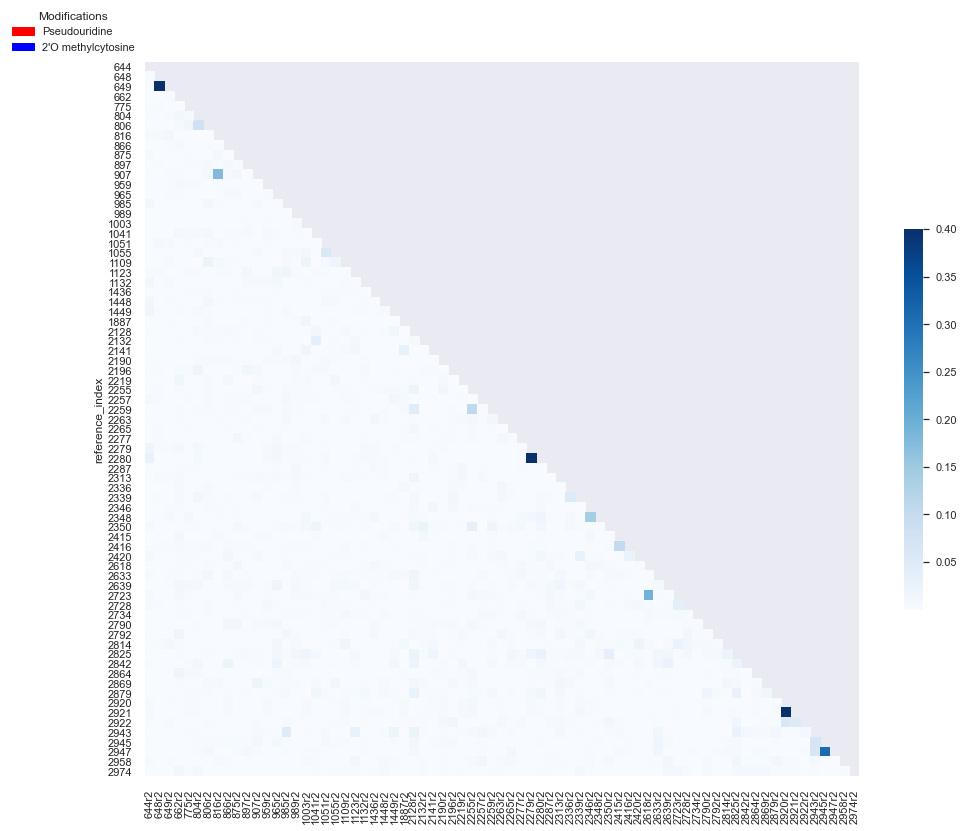

In [15]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "binary"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc._plot_ld_heatmap(X, contig, stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)


In [18]:
X = Dbp3d[Dbp3d[[1436, 1448, 1449]].sum(axis=1) > 2]
print(len(X))

596


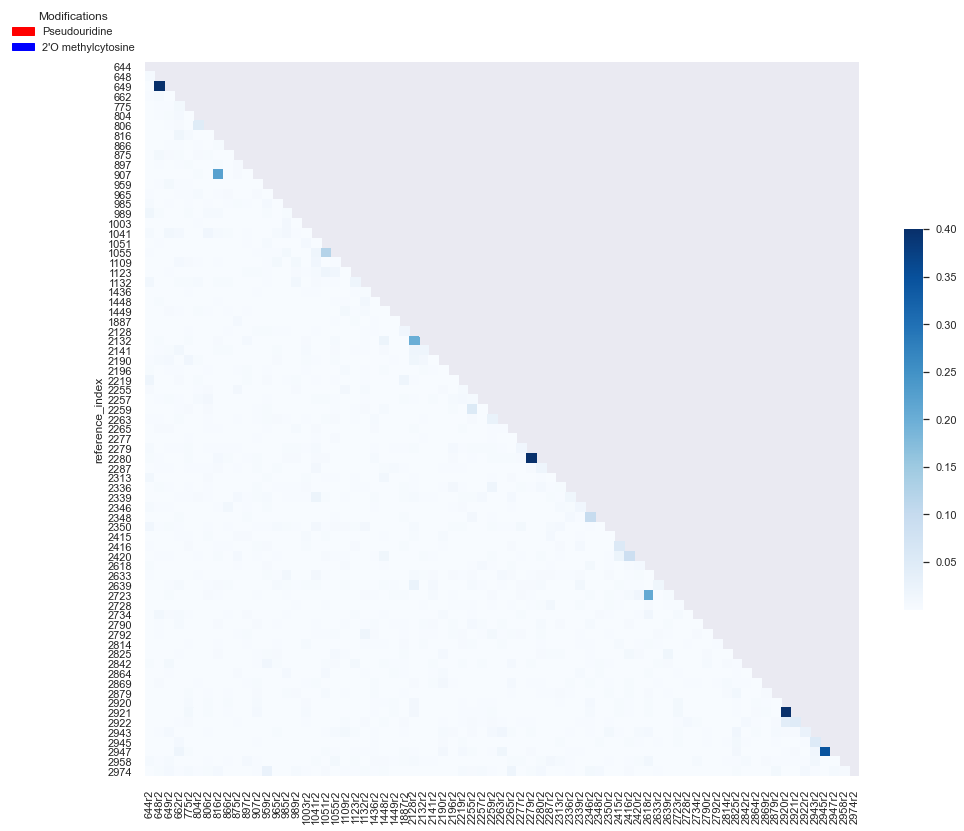

In [16]:
contig = 'RDN25-1'
save_fig_path = None
# save_fig_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/flongle/YWD448a/native_vs_YWD448a_18S.png"
cmap = "hot"
cmap = "binary"
cmap = "Blues"

norm = None
pseudou="ql"
twoprimeo=["na", "ob", "pc", "qd"]
vc._plot_ld_heatmap(X, contig, stat="r2", cmap=cmap, norm=norm, figure_path=save_fig_path)
